<a href="https://colab.research.google.com/github/adityatrivedi2001/tarun_sir/blob/master/week_5_intep_approx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [ ]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [ ]:
# ... ENTER YOUR CODE HERE
import numpy as np

def poly_fit(x,y,m):
  num_obs = len(x)
  x = np.array(x)
  X = np.zeros([num_obs, m+1])
  y = np.array(y).reshape([-1,1])
  for power in range(m+1):
    X[:,power] = x**power
  return np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,y))        #for finding the coefficients
for m in [1,2,3,4,5,6,7,8,9]:
  a = poly_fit(x,y,m)
  print(a)
  print("///////")

[[-0.6479869 ]
 [ 1.46502399]]
///////
[[-1.25772058]
 [-0.65313865]
 [ 1.0667959 ]]
///////
[[ 0.49483598]
 [-0.26983377]
 [-2.01973166]
 [ 1.01540301]]
///////
[[ 0.51184244]
 [-0.33857023]
 [-2.05689291]
 [ 1.08931365]
 [-0.01872316]]
///////
[[ 0.53158296]
 [-0.24431123]
 [-2.15174437]
 [ 0.99954653]
 [ 0.07265921]
 [-0.01835276]]
///////
[[ 0.58335489]
 [-0.21341539]
 [-2.47667914]
 [ 1.08743364]
 [ 0.3156542 ]
 [-0.17478186]
 [ 0.02574425]]
///////
[[ 0.5744677 ]
 [-0.13006497]
 [-2.3829579 ]
 [ 0.80842609]
 [ 0.3196533 ]
 [ 0.0116892 ]
 [-0.06899496]
 [ 0.01366621]]
///////
[[ 0.53749244]
 [-0.37095534]
 [-2.06051934]
 [ 1.53912235]
 [-0.54617266]
 [-0.22834563]
 [ 0.51017192]
 [-0.21721566]
 [ 0.02885626]]
///////
[[ 0.50918932]
 [-0.43758287]
 [-1.67901181]
 [ 1.61523609]
 [-1.4346596 ]
 [ 0.20209012]
 [ 0.91271626]
 [-0.64210816]
 [ 0.1643108 ]
 [-0.01477536]]
///////


### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

In [ ]:
# ... ENTER YOUR CODE HERE ...
def compute_error(x,y,m):
    coefficients = poly_fit(x,y,m)
    num_obs = len(x)
    x = np.array(x)
    X = np.zeros([num_obs, m+1])
    y = np.array(y).reshape([-1,1])
    for power in range(m+1):
      X[:,power] = x**power
    prediction = np.dot(X,coefficients)
    return 1/(num_obs-m)*np.sum((prediction-y)**2)
for m in [1,2,3,4,5,6,7,8,9,10,11]:
  e = compute_error(x,y,m)
  print(e)
  print(m)

4.4502158667062055
1
2.4534269975791783
2
0.012470899099731586
3
0.012460407583509954
4
0.012600059280330676
5
0.011590813700606682
6
0.012289041756436652
7
0.01156937152473382
8
0.01293104518211908
9
0.014257919894575331
10
0.005380200986484235
11


Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

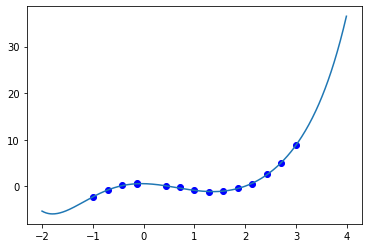

In [ ]:
# ... ENTER YOUR CODE HERE
import matplotlib.pyplot as plt
plt.plot(x,y,"bo")
for m in [6]:
    coefficients=poly_fit(x,y,m)
    x_test=np.arange(-2,4,0.01)
    X_test=np.zeros([len(x_test),m+1])
    for power in range(m+1):
        X_test[:,power]=x_test**power
    y_test=np.dot(X_test,coefficients)
    plt.plot(x_test,y_test)

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [ ]:
# ... ENTER YOUR CODE HERE ...
def ls_qr(x,y,m):
    num_obs=len(x)
    x=np.array(x)
    X=np.zeros([num_obs,m+1])
    y=np.array(y).reshape([-1,1])
    for power in range(m+1):
        X[:,power]=x**power
    return np.linalg.solve(np.dot(X.T,X),np.dot(X.T,y))
b_new=ls_qr(x,y,6)
b_new


array([[ 0.58335489],
       [-0.21341539],
       [-2.47667914],
       [ 1.08743364],
       [ 0.3156542 ],
       [-0.17478186],
       [ 0.02574425]])

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

[1.57079633 1.58666296 1.60252959 1.61839622 1.63426285 1.65012947
 1.6659961  1.68186273 1.69772936 1.71359599 1.72946262 1.74532925
 1.76119588 1.77706251 1.79292914 1.80879577 1.8246624  1.84052903
 1.85639566 1.87226229 1.88812892 1.90399555 1.91986218 1.93572881
 1.95159544 1.96746207 1.9833287  1.99919533 2.01506195 2.03092858
 2.04679521 2.06266184 2.07852847 2.0943951  2.11026173 2.12612836
 2.14199499 2.15786162 2.17372825 2.18959488 2.20546151 2.22132814
 2.23719477 2.2530614  2.26892803 2.28479466 2.30066129 2.31652792
 2.33239455 2.34826118 2.3641278  2.37999443 2.39586106 2.41172769
 2.42759432 2.44346095 2.45932758 2.47519421 2.49106084 2.50692747
 2.5227941  2.53866073 2.55452736 2.57039399 2.58626062 2.60212725
 2.61799388 2.63386051 2.64972714 2.66559377 2.6814604  2.69732703
 2.71319366 2.72906028 2.74492691 2.76079354 2.77666017 2.7925268
 2.80839343 2.82426006 2.84012669 2.85599332 2.87185995 2.88772658
 2.90359321 2.91945984 2.93532647 2.9511931  2.96705973 2.98292

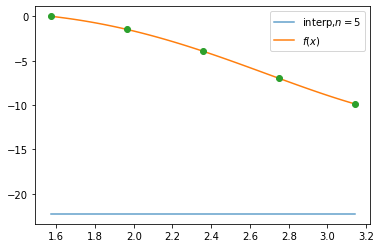

In [ ]:
# ... ENTER YOUR CODE HERE ...
import matplotlib.pyplot as plt
import math
%matplotlib inline
def lagrange_k(xval,xk,k):
  n = len(xk)
  term = 1.0
  for j in range(n):
    if j == k:
      continue
      num = xval - xk[j]
      den = xk[k] - xk[j]
      term*=num/den
  return term

def lagrange(xval,xk,yk):
    return sum(yk[j]*lagrange_k(xval,xk,j) for j in range(len(xk)))

def plot_interp(func,nodes,add_legend=True):
    yy=func(nodes)
    xn=np.linspace(math.pi/2,math.pi,100)
    yn=[lagrange(_,nodes,yy) for _ in xn]
    #plot
    print(xn)
    print(yn) 
    plt.plot(xn,yn,'-',alpha=0.7,label=r'interp,$n=%s$' %len(nodes))
    plt.plot(xn,func(xn),label=r'$f(x)$')
    plt.plot(nodes,yy,'o')
    if add_legend:
        plt.legend(loc='best')


nodes=np.linspace(math.pi/2,math.pi,5)
plot_interp(lambda x:(x**2)*np.cos(x),nodes)

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

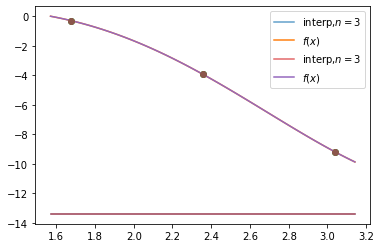

In [ ]:
# ... ENTER YOUR CODE HERE ...
def cheb_nodes(n):
  k = np.arange(n)
  return (np.cos((2*k+1)*np.pi/(2*n)))*0.25*np.pi+0.75*np.pi
plot_interp(lambda x:(x**2)*np.cos(x),nodes=cheb_nodes(3))
def cheb_nodes(n):
    k=np.arange(n)
    return (np.cos((2*k+1)*np.pi/(2*n)))*0.25*np.pi+0.75*np.pi
plot_interp(lambda x:(x**2)*np.cos(x),nodes=cheb_nodes(3))